# Activity 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from scipy.optimize import curve_fit

In [3]:
data_x = {} #create dictionaries
data_y = {}

for N in (10, 100, 1000):
    hf = h5py.File(f'/Users/ananya/Downloads/data_N{N}.h5', 'r')
    data_x[N] = hf['x'][()]
    data_y[N] = hf['y'][()]

In [5]:
import numpy as np

class MLP:
    def __init__(self, input_size, hidden_sizes, output_size):
        self.input_size = input_size
        self.hidden_sizes = hidden_sizes
        self.output_size = output_size
        self.num_layers = len(hidden_sizes) + 1
        print('num layers',self.num_layers)
        # Initialize the weights and biases for each layer
        self.weights = []
        self.biases = []
        sizes = [input_size] + hidden_sizes + [output_size]
        print(sizes)
        for i in range(1, self.num_layers + 1):
            self.weights.append(np.random.randn(sizes[i], sizes[i-1]))
            #print(self.weights)
            self.biases.append(np.random.randn(sizes[i], 1))
        #print(self.biases)

    def forward_regression(self, X):
        # Forward propagation through the network
        #print(X.shape)
        self.activations = [X]
        self.z = []
        for i in range(self.num_layers):
            z = np.dot(self.weights[i], self.activations[i]) + self.biases[i]
            self.z.append(z)
            if i < self.num_layers - 1:
                a = self.tanh(z)  # Tanh activation for hidden layers
            else:
                a = z  # Linear activation for output layer
            self.activations.append(a)
        #print(self.activations[-1])
        return self.activations[-1]  # shape: (output_size, m)

    def forward_classification(self, X):
        # Forward propagation through the network
        #print(X.shape)
        self.activations = [X]
        self.z = []
        for i in range(self.num_layers):
            z = np.dot(self.weights[i], self.activations[i]) + self.biases[i]
            self.z.append(z)
            if i < self.num_layers - 1:
                a = self.tanh(z)  # Tanh activation for hidden layers
            else:
                a = self.sigmoid(z) # Linear activation for output layer
            self.activations.append(a)
        #print(self.activations[-1])
        return self.activations[-1]  # shape: (output_size, m)
    

    def backward_regression(self, X, y):
        m = X.shape[1]  # Number of training examples

        # Compute gradients
        gradients = []
        dZ = self.activations[-1] - y  # shape: (output_size, m)
        for i in range(self.num_layers - 1, -1, -1):
            dW = (1 / m) * np.dot(dZ, self.activations[i].T)  # shape: (sizes[i], sizes[i-1])
            db = (1 / m) * np.sum(dZ, axis=1, keepdims=True)  # shape: (sizes[i], 1)
            gradients.append((dW, db))

            if i > 0:
                dA = np.dot(self.weights[i].T, dZ)  # shape: (sizes[i-1], m)
                dZ = dA * self.gradient_tanh(self.z[i-1])  # shape: (sizes[i-1], m)

        return gradients[::-1]  # Reverse the gradients



    def backward_classification(self, X, y):
        m = X.shape[1]  # Number of training examples

        # Initialize gradients list
        gradients = []

        # Step 1: Output layer - Compute dZ for the output layer
        # Binary Cross-Entropy loss derivative with respect to output
        dA_output = self.activations[-1] - y  # This is the gradient of the loss w.r.t output
        dZ_output = dA_output * self.gradient_sigmoid(self.z[-1])  # Sigmoid derivative

        # Compute gradients for weights and biases at the output layer
        dW_output = (1 / m) * np.dot(dZ_output, self.activations[-2].T)  # dW = dZ * a^T (for weights)
        db_output = (1 / m) * np.sum(dZ_output, axis=1, keepdims=True)  # db = sum(dZ)

       # Append output layer gradients to list
        gradients.append((dW_output, db_output))

       # Step 2: Backpropagate through hidden layers
       # Loop through hidden layers (starting from the second to last layer)
        for i in range(self.num_layers - 1, 0, -1):
            dA = np.dot(self.weights[i].T, dZ_output)  # dA = W^T * dZ
            dZ = dA * self.gradient_tanh(self.z[i - 1])  # Apply gradient of tanh for hidden layers

        # Compute gradients for weights and biases in hidden layers
        dW = (1 / m) * np.dot(dZ, self.activations[i - 1].T)  # dW = dZ * a^T
        db = (1 / m) * np.sum(dZ, axis=1, keepdims=True)  # db = sum(dZ)

        # Append hidden layer gradients to list
        gradients.append((dW, db))

        # Update dZ_output for the next layer
        dZ_output = dZ

    # Reverse the order of gradients to correspond to layers' order
        return gradients[::-1]  # Reverse the order for correct layer-wise gradients


    def update_parameters(self, gradients, learning_rate):
        # Update parameters using gradients and learning rate
        for i in range(self.num_layers):
            self.weights[i] -= learning_rate * gradients[i][0]
            self.biases[i] -= learning_rate * gradients[i][1]


    def cross_entropy_loss(self, y_pred, y_true):
    # Binary cross-entropy loss for binary classification
        epsilon = 1e-15  # To avoid log(0)
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # Prevent log(0)
        return -np.mean(np.sum(y_true * np.log(y_pred), axis=0))

    def compute_loss(self, y_pred, y_true):
    # For multi-class classification
        if y_true.shape[0] == 1:  # Binary classification
            return self.cross_entropy_loss(y_pred, y_true)
        else:
            return self.cross_entropy_loss(y_pred, y_true)

    def tanh(self, Z):
        # Hyperbolic tangent (tanh) activation function
        return np.tanh(Z)

    def gradient_tanh(self, Z):
        # Gradient of the hyperbolic tangent (tanh) activation function
        return 1 - np.tanh(Z)**2

    def sigmoid(self, Z):
        return 1/(1 + np.exp(-Z))

        
    def gradient_sigmoid(self, Z):
        sig = self.sigmoid(Z)
        return sig * (1 - sig)  # Derivative of sigmoid

### Regression

800
input size 1
num layers 2
[1, 10, 1]


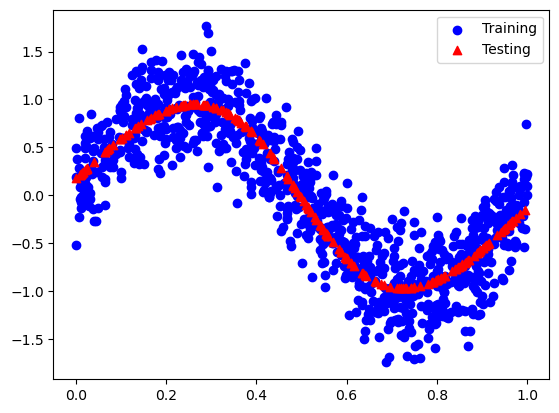

In [56]:
if __name__ == "__main__":
    from sklearn.datasets import make_regression
    from sklearn.model_selection import train_test_split
    import matplotlib.pyplot as plt
    import numpy as np

    X, y = data_x[1000], data_y[1000]
    #print(X.shape)
    plt.scatter(X,y,marker='o',color='blue', label='Training')
    # Split the dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   

    # correct sizes = (sample_size, m) here m = 1
    X_train = X_train.reshape(-1, 1)
    X_test = X_test.reshape(-1, 1)
    y_train = y_train.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)

    # Define the MLP model
    input_size = X_train.shape[1]
    print(X_train.shape[0]) 
    print('input size',input_size)
    hidden_sizes = [10, ]   #only one hidden layer
    output_size = y_train.shape[1]
    mlp = MLP(input_size, hidden_sizes, output_size)

    # Training parameters
    num_epochs = 30000
    learning_rate = 0.01

    # Training loop
    for epoch in range(num_epochs):
        # Forward pass
        outputs = mlp.forward_regression(X_train.T)    #transpose is taken because we will do dot product with the weight vectors. there it should be
        # W.X^T.

        # Backward pass and parameter update
        gradients = mlp.backward_regression(X_train.T, y_train.T)
        mlp.update_parameters(gradients, learning_rate)

        # Compute and print loss
        loss = np.mean((outputs - y_train.T) ** 2)
        # if (epoch + 1) % 300 == 0:
        #     print(f"Epoch {epoch+1} - Loss: {loss}")

    # Testing

    test_outputs = mlp.forward_regression(X_test.T)
    test_loss = np.mean((test_outputs - y_test.T) ** 2)

    plt.scatter(X_test, test_outputs.T,marker='^',color='red', label='Testing')
    plt.legend()
    #print(f"Test Loss: {test_loss}")

### Classification

In [11]:
#red points in Bishop
#mu1 = [1.5, -2]  
mu1 = [3.8, 1.5]
cov1 = [[0.8596, 0.1502], [0.1502, 0.3397]]
sample1 = np.random.multivariate_normal(mu1, cov1, 200) #class1


#blue points in Bishop
mu2 = [1, 2.8]  
cov2 = [[0.8596, 0.1502], [0.1502, 0.3397]]
sample2 = np.random.multivariate_normal(mu2, cov2, 200) #class2


X_class = np.append(sample1, sample2, axis=0) # X = [X1, X2] = [X1, X2] from sample1 and sample2 are stacked together = (row = N, column = 2)
# = np.append[(row = N/2, column = 2), (row = N/2, column = 2)]
#print(X)
Y_class = np.append([1 for points in sample1], [-1 for points in sample2], axis=0) # Y = (row = N, column = 2) = target vector


X_class_train, X_class_test, Y_class_train, Y_class_test = train_test_split(X_class, Y_class, test_size=0.20, random_state=42)
sample1_train = X_class_train[Y_class_train == 1]  # Extract points where Y_train == 1
sample2_train = X_class_train[Y_class_train == -1]  # Extract points where Y_train == -1

print(Y_class_train.reshape(-1, 1).shape)

(320, 1)


input size 2
num layers 2
[2, 10, 1]


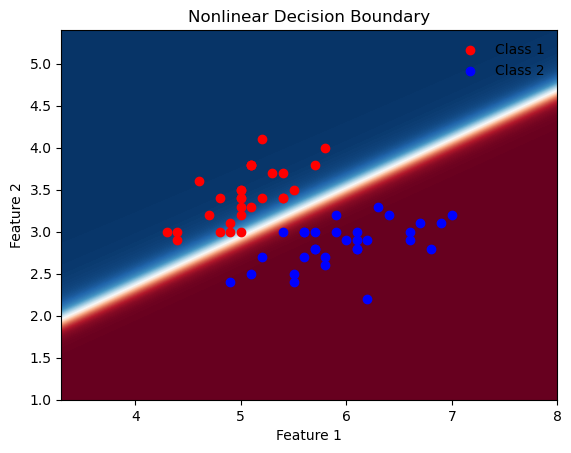

In [50]:
if __name__ == "__main__":

    # correct sizes = (sample_size, m) here m = 1
    Y_class_train = Y_class_train.reshape(-1, 1)
    Y_class_test = Y_class_test.reshape(-1, 1)

    # Define the MLP model
    input_size = X_class_train.shape[1]
    #print(X_train.shape[0]) 
    print('input size',input_size)
    hidden_sizes = [10, ]   #only one hidden layer
    output_size = Y_class_train.shape[1]
    mlp = MLP(input_size, hidden_sizes, output_size)

    # Training parameters
    num_epochs = 30000
    learning_rate = 0.01

    # Training loop
    for epoch in range(num_epochs):
        # Forward pass
        outputs = mlp.forward_classification(X_class_train.T)    #transpose is taken because we will do dot product with the weight vectors. there it should be
        # W.X^T.

        # Backward pass and parameter update
        gradients = mlp.backward_classification(X_class_train.T, Y_class_train.T)
        mlp.update_parameters(gradients, learning_rate)

        # Compute and print loss
        loss = mlp.compute_loss(outputs, Y_class_train.T)  # Use classification loss
        #if (epoch + 1) % 100 == 0:
            #print(f"Epoch {epoch+1} - Loss: {loss}")

# Testing
    test_outputs = mlp.forward_classification(X_class_test.T)
    test_loss = mlp.compute_loss(test_outputs, Y_class_test.T)
    #print(f"Test Loss: {test_loss}")

    # Define grid
    x_min, x_max = X_class[:, 0].min() - 1, X_class[:, 0].max() + 1
    y_min, y_max = X_class[:, 1].min() - 1, X_class[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    
    # Flatten grid and pass through MLP
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    predictions = mlp.forward_classification(grid_points.T).T
    predictions = predictions.reshape(xx.shape)
    
    # Convert continuous values to binary predictions (e.g., > 0.5 -> class 1, else class -1)
    # predictions_binary = (predictions > 0.5).astype(int)
    # predictions_binary = predictions_binary.reshape(xx.shape)
    
    
    # Plot decision boundary
    plt.contourf(xx, yy, predictions, levels=np.linspace(0, 1, 1000), cmap='RdBu')

    # Plot training points for class 1 and class 2
    plt.scatter(sample1_train[:, 0], sample1_train[:, 1], color='red', label='Class 1')
    plt.scatter(sample2_train[:, 0], sample2_train[:, 1], color='blue', label='Class 2')
    
    plt.legend(frameon=False)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Nonlinear Decision Boundary")
    plt.show()

# Activity 2

### Varying no. of nodes in a hidden layer and no. of hidden layers

In [16]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

X, y = data_x[1000], data_y[1000]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 #y data is just 1D so only need to reshape x data for MLP regressor
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

hidden_sizes_list = [
    (10,),    
    (10, 10, 10,),    
    (10, 10, 10, 10, 10, 10,),
    (20,),
    (20, 20, 20,),    
    (20, 20, 20, 20, 20, 20,),
    (80,),
    (80, 80, 80,),    
    (80, 80, 80, 80, 80, 80,),
    (150,),
    (150, 150, 150,),    
    (150, 150, 150, 150, 150, 150,),
    (1000,),
    (1000, 1000, 1000,),    
    (1000, 1000, 1000, 1000, 1000, 1000,),
    (10, 50, 100, 200, 500, 1000)
    ]

#default solver and activation give the best r2 score
for hidden_size in hidden_sizes_list:
    mlp = MLPRegressor(hidden_layer_sizes=hidden_size, solver= 'adam', activation = 'relu', max_iter=1000, random_state=42) 
    mlp.fit(X_train, y_train)
    
    # Predicting and evaluating R² score
    y_pred = mlp.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    print(f"r2 Score for {hidden_size} nodes: {r2:.4f}")

r2 Score for (10,) nodes: 0.5490
r2 Score for (10, 10, 10) nodes: 0.8524
r2 Score for (10, 10, 10, 10, 10, 10) nodes: 0.8548
r2 Score for (20,) nodes: 0.5922
r2 Score for (20, 20, 20) nodes: 0.8497
r2 Score for (20, 20, 20, 20, 20, 20) nodes: 0.8409
r2 Score for (80,) nodes: 0.8386
r2 Score for (80, 80, 80) nodes: 0.8525
r2 Score for (80, 80, 80, 80, 80, 80) nodes: 0.8498
r2 Score for (150,) nodes: 0.8432
r2 Score for (150, 150, 150) nodes: 0.8554
r2 Score for (150, 150, 150, 150, 150, 150) nodes: 0.8428
r2 Score for (1000,) nodes: 0.8444
r2 Score for (1000, 1000, 1000) nodes: 0.8510
r2 Score for (1000, 1000, 1000, 1000, 1000, 1000) nodes: 0.8469
r2 Score for (10, 50, 100, 200, 500, 1000) nodes: 0.8441


In [18]:
X, y = data_x[1000], data_y[1000]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 #y data is just 1D so only need to reshape x data for MLP regressor
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

iter_list = [10, 50, 100, 500, 1000, 5000, 10000, 50000]

#default solver and activation give the best r2 score
for iteration in iter_list:
    mlp = MLPRegressor(hidden_layer_sizes=hidden_size, solver= 'adam', activation = 'relu', max_iter=iteration, random_state=42) 
    mlp.fit(X_train, y_train)
    
    # Predicting and evaluating R² score
    y_pred = mlp.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    print(f"r2 Score for {iteration} epochs: {r2:.4f}")

/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


r2 Score for 10 epochs: 0.6872
r2 Score for 50 epochs: 0.8441
r2 Score for 100 epochs: 0.8441
r2 Score for 500 epochs: 0.8441
r2 Score for 1000 epochs: 0.8441
r2 Score for 5000 epochs: 0.8441
r2 Score for 10000 epochs: 0.8441
r2 Score for 50000 epochs: 0.8441


### MLP from scratch: Varying no. of nodes in hidden layer keeping only one hidden layer

8
input size 1
Training with hidden sizes: [8]
num layers 2
[1, 8, 1]
Training with hidden sizes: [50]
num layers 2
[1, 50, 1]
Training with hidden sizes: [200]
num layers 2
[1, 200, 1]


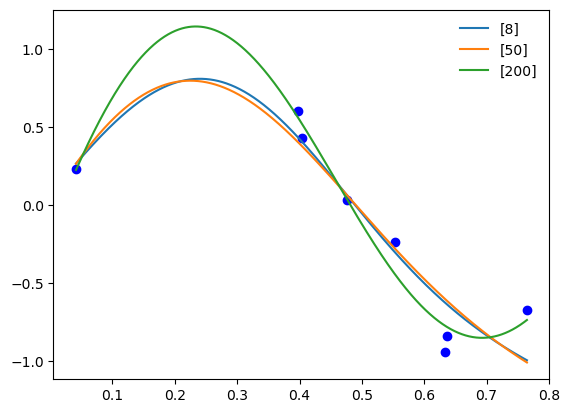

In [22]:
if __name__ == "__main__":
    from sklearn.datasets import make_regression
    from sklearn.model_selection import train_test_split
    import matplotlib.pyplot as plt
    import numpy as np

    X, y = data_x[10], data_y[10]
    #print(X.shape)
    # Split the dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   
    #X_train = (input_data_size, m) m is number of x_m vectors. for sinusoidal example, m = 1 and input size = sample size.
    

    # Normalize the input data
    # X_train_mean = np.mean(X_train)
    # X_train_std = np.std(X_train)
    # X_train = (X_train - X_train_mean) / X_train_std
    # X_test = (X_test - X_train_mean) / X_train_std


    # correct sizes = (sample_size, m) here m = 1
    X_train = X_train.reshape(-1, 1)
    X_test = X_test.reshape(-1, 1)
    y_train = y_train.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)

    plt.scatter(X_train,y_train,marker='o',color='blue')

    # Define the MLP model
    input_size = X_train.shape[1]
    print(X_train.shape[0]) 
    print('input size',input_size)
    #hidden_sizes = [500, ]   #only one hidden layer
    hidden_sizes_list = [
    [8],    # Configuration 1: one hidden layer with 10 nodes
    [50],    # Configuration 2: one hidden layer with 20 nodes
    [200] # Configuration 3: one hidden layer with 30 nodes
    ]
    output_size = y_train.shape[1]
    
    for hidden_sizes in hidden_sizes_list:
        print(f"Training with hidden sizes: {hidden_sizes}")
        mlp = MLP(input_size, hidden_sizes, output_size)
    
        # Training parameters
        num_epochs = 30000
        learning_rate = 0.01
    
        # Training loop
        for epoch in range(num_epochs):
            # Forward pass
            outputs = mlp.forward_regression(X_train.T)    #transpose is taken because we will do dot product with the weight vectors. there it should be
            # W.X^T.
    
            # Backward pass and parameter update
            gradients = mlp.backward_regression(X_train.T, y_train.T)
            mlp.update_parameters(gradients, learning_rate)
    
            # Compute and print loss
            loss = np.mean((outputs - y_train.T) ** 2)
            # if (epoch + 1) % 300 == 0:
            #     print(f"Epoch {epoch+1} - Loss: {loss}")
    
        # Testing
        
        X_cont = np.linspace(X_train.min(), X_train.max(), 1000)
        X_cont = X_cont.reshape(-1,1)
        test_outputs = mlp.forward_regression(X_cont.T)
        #test_loss = np.mean((test_outputs - y_test.T) ** 2)
        
        plt.plot(X_cont, test_outputs.T, label=f'{hidden_sizes}')
    #print(f"Test Loss: {test_loss}")

plt.legend(frameon = False)
plt.show()

### Varying no. of hidden layers keeping same number of nodes

80
input size 1
Training with hidden sizes: [10, 10]
num layers 3
[1, 10, 10, 1]
Training with hidden sizes: [10, 10, 10]
num layers 4
[1, 10, 10, 10, 1]
Training with hidden sizes: [10, 10, 10, 10, 10]
num layers 6
[1, 10, 10, 10, 10, 10, 1]
Training with hidden sizes: [10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
num layers 11
[1, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1]


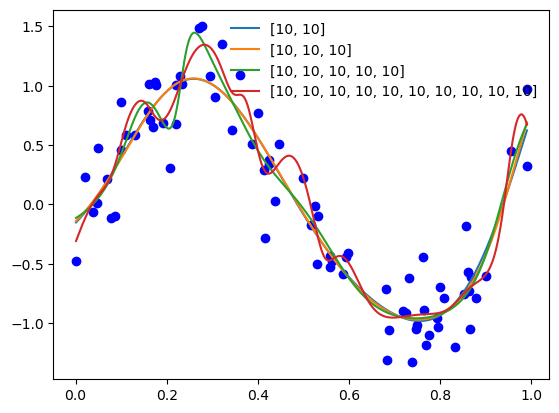

In [25]:
if __name__ == "__main__":
    from sklearn.datasets import make_regression
    from sklearn.model_selection import train_test_split
    import matplotlib.pyplot as plt
    import numpy as np

    X, y = data_x[100], data_y[100]
    #print(X.shape)
    # Split the dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   

    # correct sizes = (sample_size, m) here m = 1
    X_train = X_train.reshape(-1, 1)
    X_test = X_test.reshape(-1, 1)
    y_train = y_train.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)

    plt.scatter(X_train,y_train,marker='o',color='blue')

    # Define the MLP model
    input_size = X_train.shape[1]
    print(X_train.shape[0]) 
    print('input size',input_size)
    #hidden_sizes = [500, ]   #only one hidden layer
    hidden_sizes_list = [
    [10, 10],     
    [10, 10, 10],     
    [10, 10, 10, 10, 10],
    [10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
    ]
    output_size = y_train.shape[1]
    
    for hidden_sizes in hidden_sizes_list:
        print(f"Training with hidden sizes: {hidden_sizes}")
        mlp = MLP(input_size, hidden_sizes, output_size)
    
        # Training parameters
        num_epochs = 30000
        learning_rate = 0.01
    
        # Training loop
        for epoch in range(num_epochs):
            # Forward pass
            outputs = mlp.forward_regression(X_train.T)    #transpose is taken because we will do dot product with the weight vectors. there it should be
            # W.X^T.
    
            # Backward pass and parameter update
            gradients = mlp.backward_regression(X_train.T, y_train.T)
            mlp.update_parameters(gradients, learning_rate)
    
            # Compute and print loss
            loss = np.mean((outputs - y_train.T) ** 2)
            # if (epoch + 1) % 300 == 0:
            #     print(f"Epoch {epoch+1} - Loss: {loss}")
    
        # Testing
        
        X_cont = np.linspace(X_train.min(), X_train.max(), 1000)
        X_cont = X_cont.reshape(-1,1)
        test_outputs = mlp.forward_regression(X_cont.T)
        #test_loss = np.mean((test_outputs - y_test.T) ** 2)
        
        plt.plot(X_cont, test_outputs.T, label=f'{hidden_sizes}')
    #print(f"Test Loss: {test_loss}")

plt.legend(frameon = False)
plt.show()

8
input size 1
num layers 2
[1, 10, 1]
Num of epochs: 30
Num of epochs: 300
Num of epochs: 3000
Num of epochs: 30000


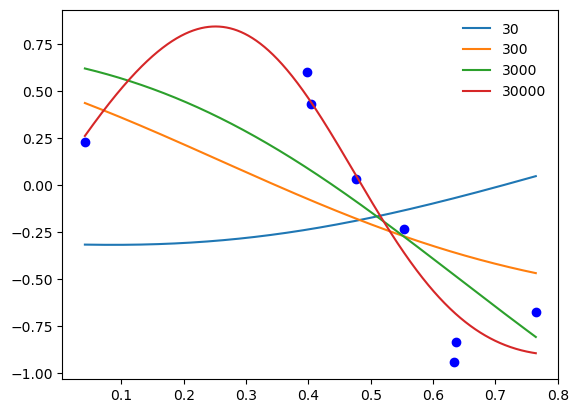

In [27]:
if __name__ == "__main__":
    from sklearn.datasets import make_regression
    from sklearn.model_selection import train_test_split
    import matplotlib.pyplot as plt
    import numpy as np

    X, y = data_x[10], data_y[10]
    #print(X.shape)
    # Split the dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   

    # correct sizes = (sample_size, m) here m = 1
    X_train = X_train.reshape(-1, 1)
    X_test = X_test.reshape(-1, 1)
    y_train = y_train.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)

    plt.scatter(X_train,y_train,marker='o',color='blue')

    # Define the MLP model
    input_size = X_train.shape[1]
    print(X_train.shape[0]) 
    print('input size',input_size)
    #hidden_sizes = [500, ]   #only one hidden layer
    hidden_sizes = [10]    # Configuration 1: one hidden layer with 10 nodes
    mlp = MLP(input_size, hidden_sizes, output_size)
    
    output_size = y_train.shape[1]

    epochs_list = [30, 300, 3000, 30000]
    
    for num_epochs in epochs_list:
        print(f"Num of epochs: {num_epochs}")
    
        # Training parameters
        #num_epochs = 30000
        learning_rate = 0.01
    
        # Training loop
        for epoch in range(num_epochs):
            # Forward pass
            outputs = mlp.forward_regression(X_train.T)    #transpose is taken because we will do dot product with the weight vectors. there it should be
            # W.X^T.
    
            # Backward pass and parameter update
            gradients = mlp.backward_regression(X_train.T, y_train.T)
            mlp.update_parameters(gradients, learning_rate)
    
            # Compute and print loss
            loss = np.mean((outputs - y_train.T) ** 2)
            # if (epoch + 1) % 300 == 0:
            #     print(f"Epoch {epoch+1} - Loss: {loss}")
    
        # Testing
        
        X_cont = np.linspace(X_train.min(), X_train.max(), 1000)
        X_cont = X_cont.reshape(-1,1)
        test_outputs = mlp.forward_regression(X_cont.T)
        #test_loss = np.mean((test_outputs - y_test.T) ** 2)
        
        plt.plot(X_cont, test_outputs.T, label=f'{num_epochs}')
    #print(f"Test Loss: {test_loss}")

plt.legend(frameon = False)
plt.show()

# Activity 3

In [32]:
import pandas as pd

# Define column names (since the dataset doesn't include headers)
column_names = ["Feature 0", "Feature 1", "Feature 2", "Feature 3", "species"]

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=column_names)

#print(df.head(50))

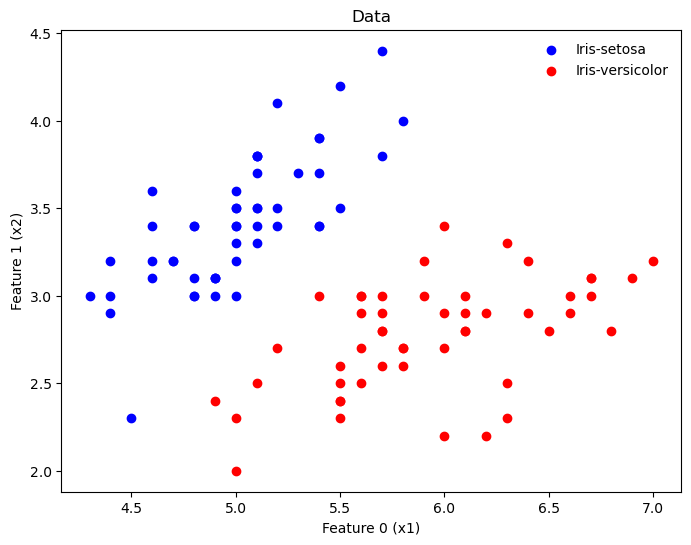

In [58]:
df = df.rename(columns={"Feature 0": "x1", "Feature 1": "x2"})

df_filtered = df[df["species"].isin(["Iris-setosa", "Iris-versicolor"])]

plt.figure(figsize=(8,6))

# Plot the two classes
plt.scatter(df_filtered[df_filtered['species'] == 'Iris-setosa']['x1'], 
            df_filtered[df_filtered['species'] == 'Iris-setosa']['x2'], 
            label='Iris-setosa', color='blue')

plt.scatter(df_filtered[df_filtered['species'] == 'Iris-versicolor']['x1'], 
            df_filtered[df_filtered['species'] == 'Iris-versicolor']['x2'], 
            label='Iris-versicolor', color='red')

# Labels and title
plt.xlabel('Feature 0 (x1)')
plt.ylabel('Feature 1 (x2)')
plt.title('Data')
plt.legend(frameon = False)
plt.savefig('Act3_pts')
plt.show()

In [36]:
from sklearn.model_selection import train_test_split
sample1 = df_filtered[df_filtered['species'] == 'Iris-setosa'][['x1', 'x2']].values  # Setosa samples
sample2 = df_filtered[df_filtered['species'] == 'Iris-versicolor'][['x1', 'x2']].values  # Versicolor samples

X_class = np.append(sample1, sample2, axis=0)

Y_class = np.append([1 for _ in sample1], [-1 for _ in sample2], axis=0)

# Split into training and testing sets
X_class_train, X_class_test, Y_class_train, Y_class_test = train_test_split(X_class, Y_class, test_size=0.40)

sample1_train = X_class_train[Y_class_train == 1]  # Points where Y_train == 1 (Iris-setosa)
sample2_train = X_class_train[Y_class_train == -1]  # Points where Y_train == -1 (Iris-versicolor)
print(Y_class_train)
print("Training labels shape:", Y_class_train.reshape(-1, 1).shape)

[-1  1  1  1 -1 -1  1 -1  1  1 -1  1 -1 -1  1  1 -1  1  1 -1 -1 -1  1  1
  1 -1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1  1 -1  1  1  1  1 -1  1  1
 -1  1 -1  1 -1 -1 -1  1  1  1 -1 -1]
Training labels shape: (60, 1)


In [38]:
if __name__ == "__main__":

    # correct sizes = (sample_size, m) here m = 1
    Y_class_train = Y_class_train.reshape(-1, 1)
    Y_class_test = Y_class_test.reshape(-1, 1)

    # Define the MLP model
    input_size = X_class_train.shape[1]
    #print(X_train.shape[0]) 
    print('input size',input_size)
    hidden_sizes = [10, ]   #only one hidden layer
    output_size = Y_class_train.shape[1]
    mlp = MLP(input_size, hidden_sizes, output_size)

    # Training parameters
    num_epochs = 5000
    learning_rate = 0.01

    # Training loop
    for epoch in range(num_epochs):
        # Forward pass
        outputs = mlp.forward_classification(X_class_train.T)    #transpose is taken because we will do dot product with the weight vectors. there it should be
        # W.X^T.

        # Backward pass and parameter update
        gradients = mlp.backward_classification(X_class_train.T, Y_class_train.T)
        mlp.update_parameters(gradients, learning_rate)

        # Compute and print loss
        loss = mlp.compute_loss(outputs, Y_class_train.T)  # Use classification loss
        #if (epoch + 1) % 100 == 0:
            #print(f"Epoch {epoch+1} - Loss: {loss}")

# Testing
    test_outputs = mlp.forward_classification(X_class_test.T)
    test_loss = mlp.compute_loss(test_outputs, Y_class_test.T)
    print(f"Test Loss: {test_loss}")
    print(test_outputs)
    
    test_pred = (test_outputs > 0.5).astype(int)  # If output > 0.5, predict class 1; else, predict class -1
    test_pred = 2 * test_pred - 1
    print("Y test predicted and converted to +1 and -1: \n", test_pred)
    print("Y test data: \n", Y_class_test.T)
    misclassified = np.sum(test_pred != Y_class_test.T)  # Compare predictions with true labels

    # Print the number of misclassified points
    print(f"Number of misclassified points: {misclassified}")

input size 2
num layers 2
[2, 10, 1]
Test Loss: -2.104245488518545
[[0.95224878 0.00865768 0.90719109 0.96509135 0.90164668 0.96687016
  0.74701607 0.00417908 0.03153211 0.02313856 0.00426442 0.89107784
  0.00573648 0.94829207 0.03627036 0.95434469 0.01016887 0.93714024
  0.01066216 0.88350199 0.00548667 0.00638729 0.00653711 0.8076236
  0.00451305 0.94098409 0.00709249 0.00561588 0.68719482 0.95434469
  0.00673453 0.91913867 0.00671301 0.74701607 0.92321377 0.95092144
  0.19334101 0.0077847  0.00518496 0.92321377]]
Y test predicted and converted to +1 and -1: 
 [[ 1 -1  1  1  1  1  1 -1 -1 -1 -1  1 -1  1 -1  1 -1  1 -1  1 -1 -1 -1  1
  -1  1 -1 -1  1  1 -1  1 -1  1  1  1 -1 -1 -1  1]]
Y test data: 
 [[ 1 -1  1  1  1  1  1 -1 -1 -1 -1  1 -1  1  1  1 -1  1 -1  1 -1 -1 -1  1
  -1  1 -1 -1  1  1 -1  1 -1  1  1  1 -1 -1 -1  1]]
Number of misclassified points: 1
